<a href="https://colab.research.google.com/github/SrinithiSrinivasan/Data-Analytics/blob/master/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [15]:
img = mpimg.imread('6.jpg')
print(img)

[[[ 62  76  40]
  [ 61  77  40]
  [ 61  77  41]
  ...
  [ 58  81  39]
  [ 63  78  39]
  [ 61  77  38]]

 [[ 61  77  40]
  [ 58  75  39]
  [ 58  75  41]
  ...
  [ 58  81  39]
  [ 62  77  38]
  [ 61  77  38]]

 [[ 56  76  39]
  [ 61  79  41]
  [ 58  75  39]
  ...
  [ 57  80  38]
  [ 59  77  37]
  [ 62  78  39]]

 ...

 [[ 90  97  64]
  [ 91  98  64]
  [ 92  98  64]
  ...
  [ 88 114  69]
  [ 90 116  71]
  [ 89 115  70]]

 [[ 90  97  63]
  [ 86  96  59]
  [ 90  98  61]
  ...
  [ 90 116  71]
  [ 89 115  70]
  [ 85 110  68]]

 [[ 85  97  61]
  [ 86  96  59]
  [ 87  97  60]
  ...
  [ 88 114  69]
  [ 88 114  69]
  [ 87 113  68]]]


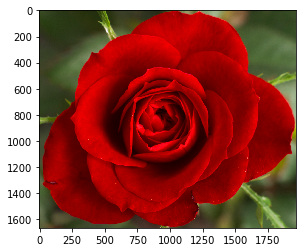

In [16]:
imgplot = plt.imshow(img)

In [17]:
img.shape

(1665, 1965, 3)

In [18]:
img.dtype

dtype('uint8')

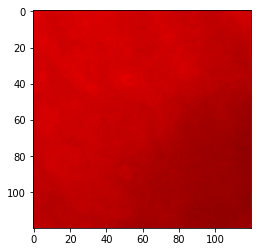

In [19]:
plt.imshow(img[320:440, 510:630], cmap=plt.cm.gray, interpolation='bilinear')   

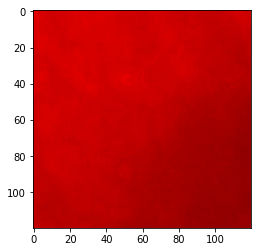

In [20]:
plt.imshow(img[320:440, 510:630], cmap=plt.cm.gray, interpolation='nearest') 

In [21]:
img[10:13,20:23]

array([[[61, 75, 39],
        [60, 75, 36],
        [58, 73, 40]],

       [[61, 75, 39],
        [60, 75, 36],
        [60, 74, 39]],

       [[61, 75, 39],
        [57, 75, 37],
        [56, 74, 36]]], dtype=uint8)

In [24]:
img.mean()

56.041805979006995

In [25]:
img.max()

255

In [26]:
img.min()

0

In [0]:
import scipy.ndimage as ndimage
lx, ly,z = img.shape
# Cropping
crop_face = img[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_face = np.flipud(img)
# rotation
rotate_face = ndimage.rotate(img, 45)
rotate_face_noreshape = ndimage.rotate(img, 45, reshape=False)

In [28]:
rotate_face

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

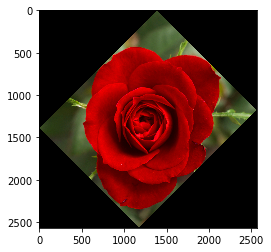

In [29]:
plt.imshow(rotate_face)

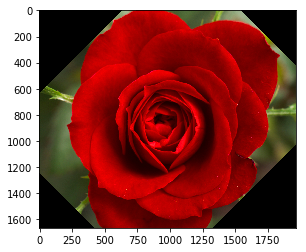

In [30]:
plt.imshow(rotate_face_noreshape)

In [0]:
blurred = ndimage.gaussian_filter(img, sigma=3)
very_blurred = ndimage.gaussian_filter(img, sigma=5)

In [32]:
blurred

array([[[58, 58, 58],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [58, 58, 57],
        [58, 58, 57],
        [58, 58, 57]],

       [[58, 58, 57],
        [58, 58, 57],
        [58, 58, 57],
        ...,
        [58, 58, 57],
        [58, 58, 57],
        [58, 58, 57]],

       [[57, 57, 57],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [58, 58, 57],
        [58, 58, 57],
        [58, 58, 57]],

       ...,

       [[81, 81, 81],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [90, 90, 90]],

       [[81, 81, 81],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [90, 90, 90]],

       [[81, 81, 81],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [90, 90, 90]]], dtype=uint8)

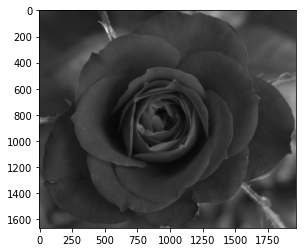

In [33]:
plt.imshow(blurred)

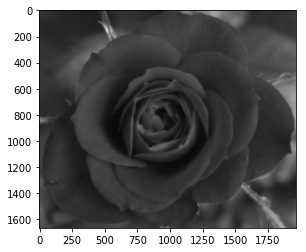

In [34]:
plt.imshow(very_blurred)

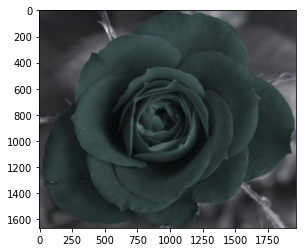

In [35]:
local_mean = ndimage.uniform_filter(img, size=11)
plt.imshow(local_mean)

In [0]:
filter_blurred_f = ndimage.gaussian_filter(blurred, 1)
alpha = 30
sharpened = blurred + alpha * (blurred - filter_blurred_f)

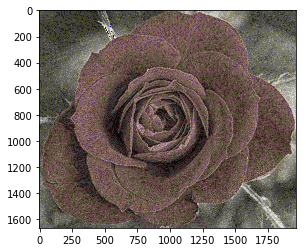

In [37]:
plt.imshow(sharpened)

In [0]:
f = img[230:290, 220:320]
noisy = f + 0.4 * f.std() * np.random.random(f.shape)

In [0]:
gauss_denoised = ndimage.gaussian_filter(img, 2)

In [0]:
med_denoised = ndimage.median_filter(img, 3)


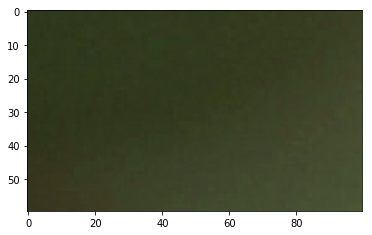

In [41]:
plt.imshow(f)

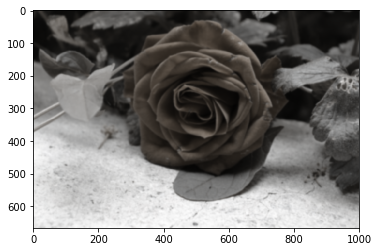

In [0]:
plt.imshow(gauss_denoised)

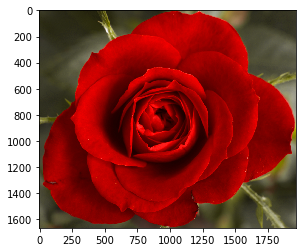

In [42]:
plt.imshow(med_denoised)

In [0]:
sx = ndimage.sobel(img, axis=0, mode='constant')
sy = ndimage.sobel(img, axis=1, mode='constant')
sob = np.hypot(sx, sy)